Hola **Gonzalo**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

## A continuación, llevaremos a cabo un análisis sobre el servicio de telefonía virtual CallMeMaybe, el cual busca desarrollar una nueva función para supervisores que les proporcione información sobre los operadores menos eficaces. Realizaremos tres estudios clave que nos ayudarán a detectar cada punto necesario para identificar a los operadores ineficaces. Estos estudios son: el análisis exploratorio de datos (EDA), la identificación de operadores ineficaces y las pruebas de hipótesis estadísticas, con la finalidad de obtener los mejores resultados posibles y una visibilidad clara de los mismos.

### Análsisi Exploratorio de Datos (EDA)

In [122]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as stats
import seaborn as sns

In [123]:
calls= pd.read_csv("telecom_dataset_new.csv")
clients= pd.read_csv("telecom_clients.csv")

Una vez cargados los datasets, se comienza su exploración para evaluar qué tan confiables pueden ser al momento de realizar el análisis. Aquí podemos observar si el archivo contiene valores duplicados o ausentes, para así eliminarlos y obtener un resultado más limpio, sin tantos sesgos.

In [124]:
print(calls.head(5))
calls.info()

   user_id                       date direction internal  operator_id  \
0   166377  2019-08-04 00:00:00+03:00        in    False          NaN   
1   166377  2019-08-05 00:00:00+03:00       out     True     880022.0   
2   166377  2019-08-05 00:00:00+03:00       out     True     880020.0   
3   166377  2019-08-05 00:00:00+03:00       out     True     880020.0   
4   166377  2019-08-05 00:00:00+03:00       out    False     880022.0   

   is_missed_call  calls_count  call_duration  total_call_duration  
0            True            2              0                    4  
1            True            3              0                    5  
2            True            1              0                    1  
3           False            1             10                   18  
4            True            3              0                   25  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Coun

In [125]:
print(clients.head(5))
clients.info()

   user_id tariff_plan  date_start
0   166713           A  2019-08-15
1   166901           A  2019-08-23
2   168527           A  2019-10-29
3   167097           A  2019-09-01
4   168193           A  2019-10-16
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB


In [126]:
print(calls.duplicated().sum())
calls_clean = calls.drop_duplicates()

4900


In [127]:
print(calls.isnull().sum())

user_id                   0
date                      0
direction                 0
internal                117
operator_id            8172
is_missed_call            0
calls_count               0
call_duration             0
total_call_duration       0
dtype: int64


In [128]:
print("Dimensiones del dataset de llamadas:", calls.shape)

Dimensiones del dataset de llamadas: (53902, 9)


In [129]:
calls_clean = calls_clean.dropna(subset=['operator_id', 'direction', 'is_missed_call', 'call_duration', 'date'])
print("\nDimensiones después de eliminar valores nulos:", calls_clean.shape)


Dimensiones después de eliminar valores nulos: (41546, 9)


Una vez eliminados los datos con valores nulos y duplicados, procedemos a convertir cada columna a su tipo de dato correcto, ya que, al inspeccionar la información con .info(), notamos que la fecha, el ID del operador y la columna internal presentan valores erróneos.

In [130]:
calls_clean.loc[:, 'date'] = pd.to_datetime(calls_clean['date'], errors='coerce')
calls_clean.loc[:,'operator_id'] = calls_clean['operator_id'].astype(int)
calls_clean.loc[:,'internal'] = calls_clean['internal'].astype(bool)

In [131]:
print(calls_clean.isnull().sum())

user_id                0
date                   0
direction              0
internal               0
operator_id            0
is_missed_call         0
calls_count            0
call_duration          0
total_call_duration    0
dtype: int64


Procedemos a obtener un resumen estadístico con .describe() para después analizar la distribución de las llamadas salientes y entrantes, así como tambien un grafico que muestra la distribución de la duracion de las llamadas, llamadas por dirección, proporción de llamadas perdidas y el top 15 de operadores con mas volumen de llamadas.

In [132]:
print("\nResumen estadístico general:")
display(calls_clean.describe())


Resumen estadístico general:


,user_id,operator_id,calls_count,call_duration,total_call_duration
count,41546.000000,41546.000000,41546.000000,41546.000000,41546.000000
mean,167301.311992,916523.315409,16.900424,1009.769172,1321.592813
std,600.418838,21230.041008,59.749373,4064.106117,4785.978633
min,166377.000000,879896.000000,1.000000,0.000000,0.000000
25%,166782.000000,900790.500000,1.000000,0.000000,67.000000
50%,167175.000000,913938.000000,4.000000,106.000000,288.000000
75%,167827.000000,937708.000000,13.000000,770.000000,1104.000000
max,168606.000000,973286.000000,4817.000000,144395.000000,166155.000000


<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Muy bien realizado el análisis inicial y el tratamiento de los dataset previo a su exploración, siempre hay que buscar tener la mejor calidad posible en tus datos
</div>

In [133]:
print("\nDistribución de la variable 'direction':")
print(calls_clean['direction'].value_counts())


Distribución de la variable 'direction':
direction
out    28813
in     12733
Name: count, dtype: int64


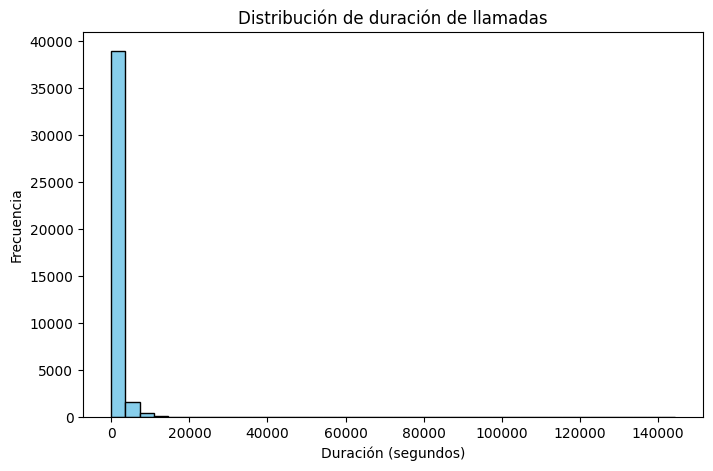

In [134]:
plt.figure(figsize=(8,5))
plt.hist(calls_clean['call_duration'], bins=40, color='skyblue', edgecolor='black')
plt.title('Distribución de duración de llamadas')
plt.xlabel('Duración (segundos)')
plt.ylabel('Frecuencia')
plt.show()

El grafico anterior nos muestra la duracion de las llamadas realizadas y con que frecuencia duran ese tiempo las llamadas realizadas ya sean entrantes o salientes.

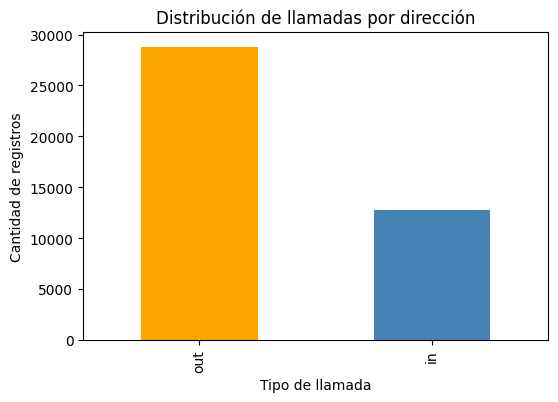

In [135]:
plt.figure(figsize=(6,4))
calls_clean['direction'].value_counts().plot(kind='bar', color=['orange', 'steelblue'])
plt.title('Distribución de llamadas por dirección')
plt.xlabel('Tipo de llamada')
plt.ylabel('Cantidad de registros')
plt.show()

En el grafico anterior se muestra la distruibucion de las llamadas totales, pero separadas por entrantes y salientes.

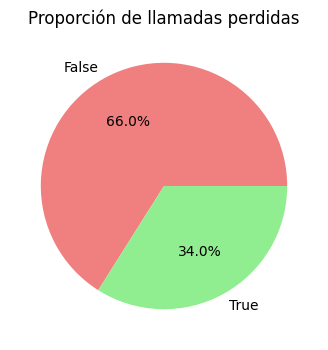

In [136]:
plt.figure(figsize=(6,4))
calls_clean['is_missed_call'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral','lightgreen'])
plt.title('Proporción de llamadas perdidas')
plt.ylabel('')
plt.show()

El grafico anterior nos muestra la proporcion de llamadas perdidos en donde nos indica que un 34% de el total de las llamadas no fueron contestadas.

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Para dejar un proceso de análisis claro, siempre que presentes gráficas se debe redactar una breve interpretación de las mismas así se puede entender mejor que es lo que aporta al objetivo del análisis del proyecto
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (3ra Iteracion)</b> <a class=“tocSkip”></a>

Correcto, así el análisis es mucho más claro
</div>

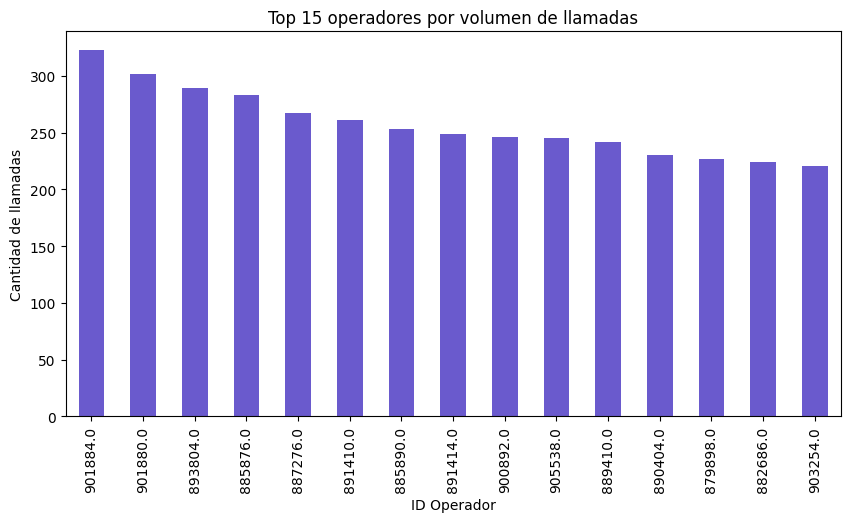

In [137]:
plt.figure(figsize=(10,5))
calls_clean['operator_id'].value_counts().head(15).plot(kind='bar', color='slateblue')
plt.title('Top 15 operadores por volumen de llamadas')
plt.xlabel('ID Operador')
plt.ylabel('Cantidad de llamadas')
plt.show()

### Identificador de operadores ineficaces

A continuacion se realizara la identificacion de operadores ineficaces, empezando por agrupar por operador y calculando las metricas.

Esto basado en las columnas relvantes del dataset las cuales establecimos que son: operator_id, direction, is_missed_call, call_duration, calls_count.

In [151]:
op = calls_clean.copy()
grp = op.groupby('operator_id', group_keys=False)

metrics = pd.DataFrame({
    'total_records': grp.size(),
    'incoming_records': grp['direction'].apply(lambda x: (x == 'in').sum()),
    'outgoing_records': grp['direction'].apply(lambda x: (x == 'out').sum()),
    'incoming_missed': grp.apply(lambda g: ((g['direction']=='in') & g['is_missed_call']).sum(), include_groups=False),
    'incoming_answered_durations_sum': grp.apply(lambda g: g.loc[(g['direction']=='in') & (~g['is_missed_call']), 'call_duration'].sum(), include_groups=False),
    'incoming_answered_count': grp.apply(lambda g: ((g['direction']=='in') & (~g['is_missed_call'])).sum(), include_groups=False),
    'outgoing_count': grp['direction'].apply(lambda x: (x == 'out').sum())
})


Procedemos a calcular las tasas y promedios.

In [139]:
metrics['avg_time_to_answer_incoming'] = metrics['incoming_answered_durations_sum'] / metrics['incoming_answered_count']
metrics['incoming_missed_rate'] = metrics['incoming_missed'] / metrics['incoming_records']
metrics['outgoing_rate'] = metrics['outgoing_count'] / metrics['total_records']

Se establecen umbrales y se marcan las diferencias.
Se han usados percentiles de la muestra para fijar umbrales adaptativos, comenzando con la alta tasa de llamadas entrantes perdidas se ajusto un percentil de >= 90 al igual para la metrica de tiempo de respuesta prolongado para llamadas entrantes, y por ultimo para la metrica de llamadas salientes la baja actividad se muestra en el percentil <= de 25, por lo cual si un operador cumple con 2 o mas de estso criterios se considera un operador ineficaz.

In [140]:
missed_rate_top = metrics['incoming_missed_rate'].quantile(0.90)
time_to_answer_top = metrics['avg_time_to_answer_incoming'].quantile(0.90)
outgoing_rate_bottom = metrics['outgoing_rate'].quantile(0.25)

metrics['flag_high_missed'] = metrics['incoming_missed_rate'] >= missed_rate_top
metrics['flag_slow_answer'] = metrics['avg_time_to_answer_incoming'] >= time_to_answer_top
metrics['flag_low_outgoing'] = metrics['outgoing_rate'] <= outgoing_rate_bottom

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Este tipo de reglas que llevan a una decisión crucial en una empresa deben quedar redactadas y explicadas de manera detallada siempre justificando en los datos y el análisis de los mismos el por qué se escogen estos umbrales, puedes hacer referencia a lo que analizaste antes en cálculos o gráficas.<!--  -->
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (3ra Iteracion)</b> <a class=“tocSkip”></a>

Bien, este tipo de decisiones siempre debes dejarlas explicadas de manera clara para que las personas del lado de negocio puedan validarlo
</div>

Aque establecemos que el operador ineficaz cumple con al menos 2 de los 3 criterios establecidos.

In [141]:
metrics['ineficaz'] = (metrics[['flag_high_missed','flag_slow_answer','flag_low_outgoing']].sum(axis=1) >= 2)

In [142]:
print("Número total de operadores:", metrics.shape[0])
print("Número de operadores ineficaces:", metrics['ineficaz'].sum())

Número total de operadores: 1092
Número de operadores ineficaces: 52


In [143]:
display(metrics[metrics['ineficaz']].sort_values(by='incoming_missed_rate', ascending=False).head(10))

,total_records,incoming_records,outgoing_records,incoming_missed,incoming_answered_durations_sum,incoming_answered_count,outgoing_count,avg_time_to_answer_incoming,incoming_missed_rate,outgoing_rate,flag_high_missed,flag_slow_answer,flag_low_outgoing,ineficaz
operator_id,,,,,,,,,,,,,,
904344.0,3,2,1,1,3,1,1,3.000000,0.500000,0.333333,True,False,True,True
913886.0,2,2,0,1,14,1,0,14.000000,0.500000,0.000000,True,False,True,True
937898.0,5,2,3,1,2017,1,3,2017.000000,0.500000,0.600000,True,True,False,True
934098.0,5,5,0,2,45,3,0,15.000000,0.400000,0.000000,True,False,True,True
919206.0,20,19,1,7,32736,12,1,2728.000000,0.368421,0.050000,True,True,True,True
940622.0,59,28,31,10,33557,18,31,1864.277778,0.357143,0.525424,True,True,False,True
913942.0,135,85,50,28,206880,57,50,3629.473684,0.329412,0.370370,True,True,False,True
951508.0,75,33,42,10,28987,23,42,1260.304348,0.303030,0.560000,True,True,False,True
925922.0,73,27,46,8,32674,19,46,1719.684211,0.296296,0.630137,True,True,False,True


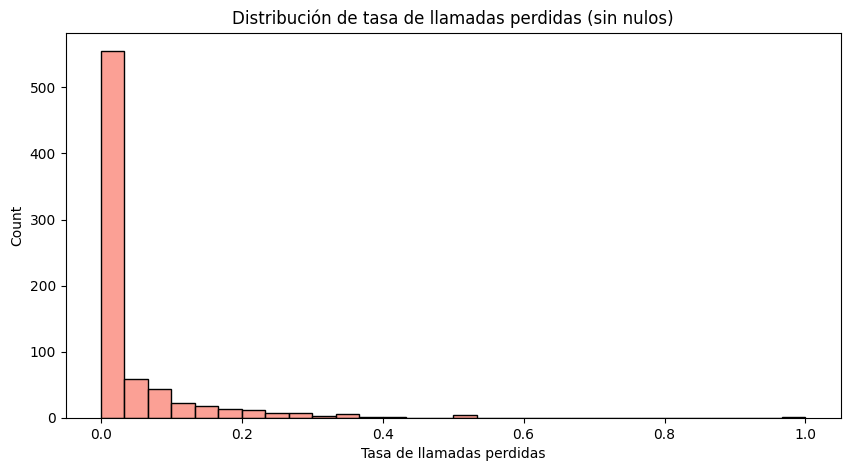

In [144]:
plt.figure(figsize=(10,5))
sns.histplot(metrics['incoming_missed_rate'], bins=30, color='salmon')
plt.title('Distribución de tasa de llamadas perdidas (sin nulos)')
plt.xlabel('Tasa de llamadas perdidas')
plt.show()

El grafico anterior nos muestra la distribucion de la tasa de llamadas perdidas sin valores nulos, esto quiere decir las llamadas entrantes que no fueron contestadas.

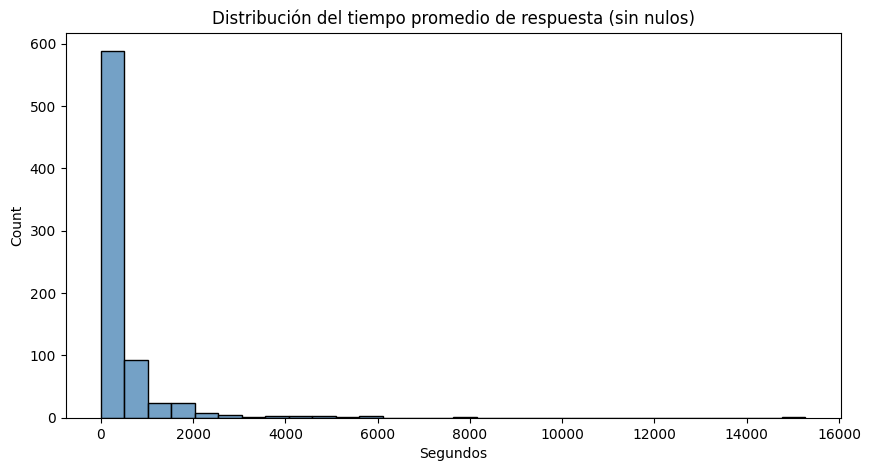

In [145]:
plt.figure(figsize=(10,5))
sns.histplot(metrics['avg_time_to_answer_incoming'].dropna(), bins=30, color='steelblue')
plt.title('Distribución del tiempo promedio de respuesta (sin nulos)')
plt.xlabel('Segundos')
plt.show()

En este grafico mostramos la distribucion de el tiempo promedio de respuesta a llamadas entrantes sin valores nulos, es decir en promedio cuanto tarda un operadore en contestar una llamada entrante.

<div class="alert alert-block alert-danger">
<s><b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Estas dos gráficas también deberían estar acompañadas de una interpretación, y para mejorar el órden también te recomiendo graficar antes de pasar a la parte de identificar operadores ineficientes.
</div></s>

### Pruebas de Hipótesis Estadística

A continuacion llevaremos a cabo las pruebas de hipotesis en las cuales estableceremos nuatras hipotesis nulas y alternativas para cada caso.

Prueba t : Tiempo promedio de respuesta.

H0= No existe diferencia significativa en el tiempo promedio de respuesta entre operadores eficaces e ineficaces.

H1= Los operadores ineficaces tienen un tiempo de respuesta promedio mayor.

In [146]:
group_inef = metrics[metrics['ineficaz']]['avg_time_to_answer_incoming'].dropna()
group_eff = metrics[~metrics['ineficaz']]['avg_time_to_answer_incoming'].dropna()

In [147]:
alpha = 0.05
t_stat, p_val = stats.ttest_ind(group_inef, group_eff, equal_var=False)
print("Prueba t - Tiempo medio de respuesta:")
print(f"t-statistic = {t_stat:.4f}, p-value = {p_val:.4f}")
if p_val < alpha:
    print("\n Diferencia significativa en tiempo medio de respuesta (ineficaces responden más lento).")
else:
    print("\n No hay diferencia significativa en el tiempo medio de respuesta.")

Prueba t - Tiempo medio de respuesta:
t-statistic = 4.8613, p-value = 0.0000

 Diferencia significativa en tiempo medio de respuesta (ineficaces responden más lento).


Prueba de Mann–Whitney U: Actividad de llamadas salientes

H0= No existe diferencia significativa en la cantidad de llamadas salientes entre los dos grupos.

H1= Los operadores ineficaces realizan menos llamadas salientes.

In [148]:
group_out_inef = metrics[metrics['ineficaz']]['outgoing_count']
group_out_eff = metrics[~metrics['ineficaz']]['outgoing_count']

In [149]:
alpha = 0.05
u_stat, p_val_u = stats.mannwhitneyu(group_out_inef, group_out_eff, alternative='less')
print("\nPrueba Mann–Whitney U - Llamadas salientes:")
print(f"U = {u_stat:.4f}, p-value = {p_val_u:.4f}")
if p_val_u < alpha:
    print(" Los operadores ineficaces realizan menos llamadas salientes (significativo).")
else:
    print(" No hay diferencia significativa en llamadas salientes.")


Prueba Mann–Whitney U - Llamadas salientes:
U = 24376.5000, p-value = 0.1142
 No hay diferencia significativa en llamadas salientes.


<div class="alert alert-block alert-danger">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

A nivel código está muy bien aplicado, pero se debe dejar redactado cual es el H1 y H0 que quieres comprobar con tu prueba estadística
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (3ra Iteracion)</b> <a class=“tocSkip”></a>

Perfecto, siempre este tipo de procesos deben quedar documentados y explicados
</div>

C:\Users\ggonz\AppData\Local\Temp\ipykernel_40812\4169979143.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10.index, y=top10['incoming_missed_rate'], palette='Reds_r')


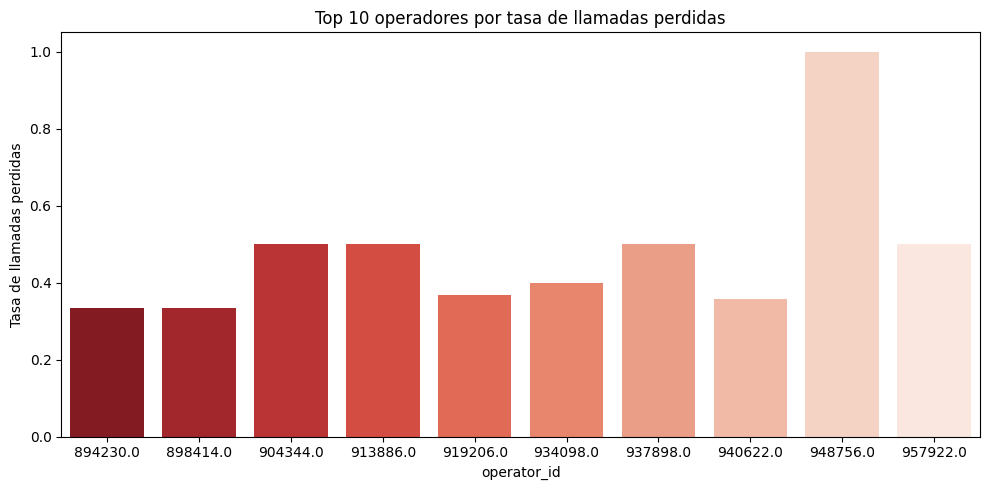

In [150]:
metrics.to_csv('ineficaces_operators_clean.csv', index=True)
plt.figure(figsize=(10,5))
top10 = metrics.sort_values(by='incoming_missed_rate', ascending=False).head(10)
sns.barplot(x=top10.index, y=top10['incoming_missed_rate'], palette='Reds_r')
plt.title('Top 10 operadores por tasa de llamadas perdidas')
plt.xlabel('operator_id')
plt.ylabel('Tasa de llamadas perdidas')
plt.tight_layout()
plt.savefig('top10_missed_clean.png')
plt.show()

## El análisis de eficiencia de los operadores del servicio de telefonía virtual CallMeMaybe permitió obtener una visión clara sobre el desempeño individual y colectivo del equipo de atención. Tras aplicar un riguroso proceso de limpieza de datos (eliminando valores nulos y duplicados) y realizar el análisis exploratorio (EDA), se logró construir un conjunto de métricas que describen de manera precisa la calidad y eficiencia del servicio. Como conclusion aportamos que la mayoria de los operadores mantiene una tasa estable y solo algunos presentan tasas elevadas de llamadas entrantes perdidas y tiempos prolongados de respuesta, mediante la creacion de indicadores clave pudimos identificar operadores con desempeño inferior a el promedio los cuales fueron catalogados como ineficaces, y por ultimo con la prueba de hipotesis se puede concluir que si hay dferencia significativa  en cuanto a el tiempo de respuesta ya que los ineficaces presentan tiempos de respuesta mas altos. 

Adjunto link de presentración en drive con correcciones y recomendaciones:

https://drive.google.com/file/d/1C951dzlhlZFM5--wz4bdDyHTVsqt-67i/view?usp=sharing

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Tienes un muy buen avance Gonzalo, pero haría falta un poco más de detalle en la parte del EDA para entender claramente los datos con los que se trabajará y también más justificación en los cálculos finales ya que en un entorno empresarial esto debe quedar muy bien explicado ya que es parte del proceso de toma de decisiones.

La presentación y conclusiones finales podrían ser más detalladas explicando y argumentando el por qué de los procesos aplicados o analizados en tu proyecto. También esta parte final es una buena sección para dejar tus recomendaciones a la empresa.

Saludos!
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (3ra Iteracion)</b> <a class=“tocSkip”></a>

A nivel código está excelente todo el proceso, ahora, lo único que haría falta cambiar un poco es la presentación. En lugar de tener screenshot de los números obtenidos es mejor que lo complementes con las gráficas de tu notebook para que los resultados puedan ser expuestos de manera más gráfica que numérica.

Sólo hace falta ese cambio y el proyecto estaría completo!
</div>

<div class="alert alert-block alert-success">
<b>Comentario general (4ta Iteracion)</b> <a class=“tocSkip”></a>

**¡Te felicito por el trabajo realizado Gonzalo!** 

La presentación quedó super clara y muy profesional, aunque se podría utilizar herramientas cómo power point o google slides para exponer los resultados de manera profesional. 

Con este proyecto demuestras las habilidades adquiridas durante tu formación, se nota tu capacidad de contar historias con datos con la excelente presentación realizada que súper fácil de entender lo cual es una habilidad super importante cómo analista de datos, el saber comunicar de manera sencilla y eficiente los resultados de tus análisis.
    
Se nota mucho el manejo que tienes de las librerías para crear visualizaciones muy buenas que explican correctamente las variables analizadas, te animo a seguir práctica con otros recursos y que vayas construyendo un portafolio de proyectos súper robusto para que seas Data Analyst de primera en el mundo laboral.
   
Saludos!
</div>